In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv'

df = pd.read_csv(url, skiprows=2)
#o dataset tem as duas primeiras linhas que podem ser ignoradas

In [3]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
# retirar a coluna customerid porque não agrega em nada (opcional)
df.drop('customerid', axis=1, inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
# extrair da coluna jobedu e criar Job e Education
df['job'] = df['jobedu'].apply(lambda x: x.split(',')[0])
df['education'] = df['jobedu'].apply(lambda x: x.split(',')[1])

#Retirar a coluna jobedu
df.drop('jobedu', axis=1, inplace=True)

df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Tratando os missing values

In [6]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [7]:
# ~ funciona como uma negação para a operaçao a seguir
df = df[~df.age.isnull()].copy()

df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [8]:
#encontrando a moda(valor que mais aparece) na coluna month
month_mode = df.month.mode()[0]

# prenchendo os lugares NA com a moda moth_mode = may, 2017
df.month.fillna(month_mode, inplace = True)

# vamos contar novamente quantos valores nulos existem
df.month.isnull().sum()

0

In [37]:
#como a coluna target é a Response não podemos mudar seus valores, por isso é melhor dropar os valores nulos
df = df[~df.response.isnull()].copy()

df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Outliers

Outliers univariados: são os pontos de dados cujos valores estão além do intervalo de valores esperados com base em uma variável. 

Distúrbios multivariados: Ao plotar dados, alguns valores de uma variável podem não estar além do intervalo esperado, mas quando você plota os dados com alguma outra variável, esses valores podem estar longe do valor esperado.

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

<AxesSubplot:>

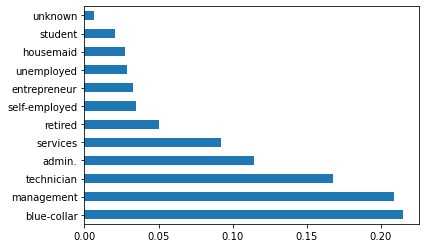

In [9]:
df.job.value_counts(normalize=True);

df.job.value_counts(normalize=True).plot.barh()

Com isso podemos ver que a maior parte dos trabladores são Blue-collar, logo em seguida de management.

### Análise Univariada Ordenada Categórica

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

<AxesSubplot:>

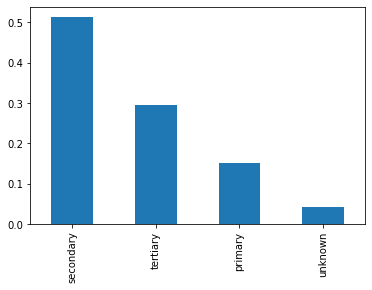

In [10]:
df.education.value_counts(normalize=True)

df.education.value_counts(normalize=True).plot.bar()

Ao analisar o gráfico podemos inferir que mais da metade parte dos dados são pertecentes a pessoas com educação de segundo grau (ensino médio), logo depois, terniario e ensino primario, ainda uma pequena parcela dos dados são desconhecidas. 

In [11]:
df.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

Análisando a descrição da coluna 'Salary' podemos inferir que, a media dos salários é de 57005.97 e que até 25% dos dados recebem até 20000, 50% recebem um salario de até 60000, 75% até 70000.

## Análise bivariada

Vamos utilizar as variaveis 'Balance', 'Age' e 'Salary' para gerar alguns gráficos de dispersão para ver a distribuição dessas delas.

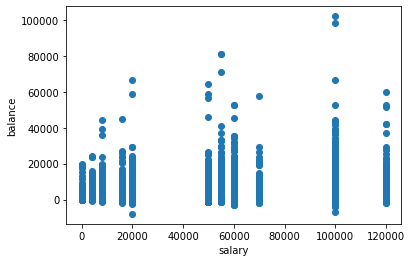

In [35]:
plt.scatter(df['salary'], df['balance'])
plt.xlabel('salary')
plt.ylabel('balance');

Podemos notas no que os dados estão distribuidos conforme apresentado pelos quartis anteriormente.

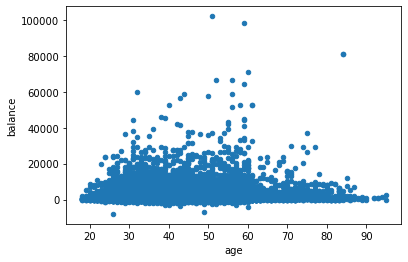

In [36]:
df.plot.scatter(x='age', y='balance');

Aqui pode ver que a maioria dos dados estão concentrados até 60 anos e respectivamente os maiores salarios.

## Matriz de correlação

Vamos ver qual a relação das variaveis atravez da matriz de correlação

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


<AxesSubplot:>

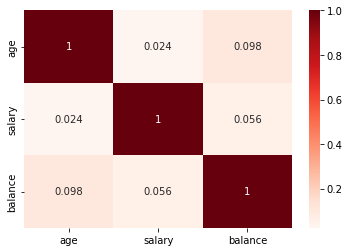

In [40]:
df[['age','salary','balance']].corr()

sns.heatmap(df[['age','salary','balance']].corr(), annot=True, cmap='Reds')

Assim podemos inferir que as variaveis utilizadas possuem um baixa correalaçõa, chegando a no máximo 9.8% entre balance e age  

## Análise categorica - Numerica

Para analisar uma variavel categorica e uma numerica podemos utilizar o groupby para isso, e ainda, calcular media e mediana delas

In [57]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [58]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

Vemos que a media das pessoas que respondem sim ou não é bastante próxima e a mediana delas é igual. Agora vamos ver esses mesmo resultados utilizando um boxplot.

<AxesSubplot:xlabel='response', ylabel='salary'>

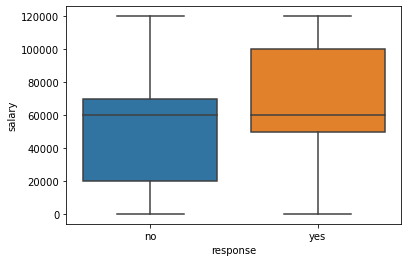

In [62]:
sns.boxplot(data=df, x='response', y='salary')

Assim conseguimos obervar que a mediana dos dois grupos são igual e possuem maximo e minimo iguais. Ainda podemos ver que a pessoas com respostas yes possuem um salario maior, onde, 75% recebem salario até 100000.

## Análise categorica

Caso essa análise fosse ser utilizada para treinar algum modelo utilizar a coluna response como númerico(yes=1, no=0) seria melhor ou até mesmo para realizar alguma analise numerica tendo com base essa coluna. Por isso vamo gerar uma nova coluna com esses valores convertido e contar seus valores no dataset.

In [57]:
df['response_rate'] = np.where(df.response=='yes',1,0)
df.response_rate.value_counts()

0    39906
1     5285
Name: response_rate, dtype: int64

Vamos ver, de acordo com o grupo conjugal, quais responsem mais yes ou no.

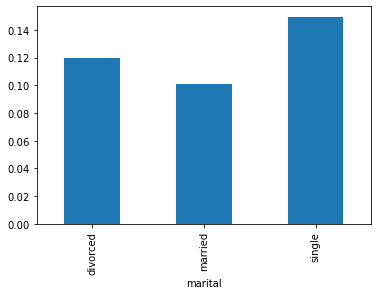

In [77]:
df.groupby('marital')['response_rate'].mean().plot.bar();

Podemos ver que, de cada categoria, os solteiros(single) respondem mais sim.

Agora vamos fazer a mesma análise para todo o data set:

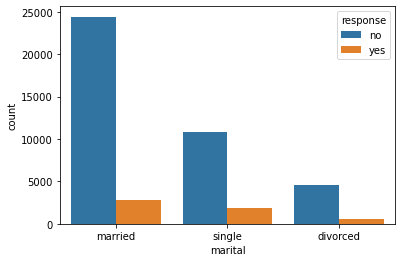

In [74]:
sns.countplot(x='marital', hue='response', data= df);

Aqui que os casados(married) respondem mais yes e no, no entando isso é 'enviesado' porque eles possuem uma maior quantidade de dados que as outras categorias.

## Análise multivariada

Se analisarmos os dados levando em consideração mais de duas variáveis/colunas de um conjunto de dados, isso é conhecido como Análise Multivariada.

Vamos ver como ‘Education’, ‘Marital’ e ‘Response_rate’ variam entre si.

In [78]:
result = pd.pivot_table(data=df, index='education', columns='marital', values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


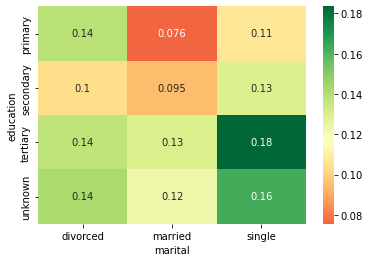

In [80]:
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117);

BaseCom base no Heatmap podemos inferir que as pessoas casadas com ensino fundamental são menos propensas a responder positivamente à pesquisa e as pessoas solteiras com ensino superior são mais propensas a responder positivamente à pesquisa.